In [17]:

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

response = requests.get('https://pokeapi.co/api/v2/pokemon/35/').text
responses_info = json.loads(response)


In [3]:
all_keys = responses_info.keys()
print(all_keys)

dict_keys(['abilities', 'base_experience', 'cries', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_abilities', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])


In [4]:

# This function will take any pokemon, and return all the information available

def poke_info (pokemon):
    response1 = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}/').text
    response_info = json.loads(response1)
   
    #This nested funcation removes unecessary keys to cut down on the noise
    
    def exclude_keys(dictionary, keys):
        return {
        key: value for key, value in dictionary.items()
        if key not in keys
        }
    result = exclude_keys(response_info, ['moves','sprites', 'game_indices', 'held_items'])
    
    return result
    


In [5]:
poke_info('venusaur')

{'abilities': [{'ability': {'name': 'overgrow',
    'url': 'https://pokeapi.co/api/v2/ability/65/'},
   'is_hidden': False,
   'slot': 1},
  {'ability': {'name': 'chlorophyll',
    'url': 'https://pokeapi.co/api/v2/ability/34/'},
   'is_hidden': True,
   'slot': 3}],
 'base_experience': 263,
 'cries': {'latest': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/latest/3.ogg',
  'legacy': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/legacy/3.ogg'},
 'forms': [{'name': 'venusaur',
   'url': 'https://pokeapi.co/api/v2/pokemon-form/3/'}],
 'height': 20,
 'id': 3,
 'is_default': True,
 'location_area_encounters': 'https://pokeapi.co/api/v2/pokemon/3/encounters',
 'name': 'venusaur',
 'order': 3,
 'past_abilities': [],
 'past_types': [],
 'species': {'name': 'venusaur',
  'url': 'https://pokeapi.co/api/v2/pokemon-species/3/'},
 'stats': [{'base_stat': 80,
   'effort': 0,
   'stat': {'name': 'hp', 'url': 'https://pokeapi.co/api/v2/stat/1/'}},
  {'base_

In [7]:
#This function returns just a pokemon's stats, something useful to reference quickly when playing through the game

def poke_stats (pokemon):
    response1 = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}/').text
    response_info = json.loads(response1)

    return response_info['stats']

In [8]:
poke_stats('charizard')

[{'base_stat': 78,
  'effort': 0,
  'stat': {'name': 'hp', 'url': 'https://pokeapi.co/api/v2/stat/1/'}},
 {'base_stat': 84,
  'effort': 0,
  'stat': {'name': 'attack', 'url': 'https://pokeapi.co/api/v2/stat/2/'}},
 {'base_stat': 78,
  'effort': 0,
  'stat': {'name': 'defense', 'url': 'https://pokeapi.co/api/v2/stat/3/'}},
 {'base_stat': 109,
  'effort': 3,
  'stat': {'name': 'special-attack',
   'url': 'https://pokeapi.co/api/v2/stat/4/'}},
 {'base_stat': 85,
  'effort': 0,
  'stat': {'name': 'special-defense',
   'url': 'https://pokeapi.co/api/v2/stat/5/'}},
 {'base_stat': 100,
  'effort': 0,
  'stat': {'name': 'speed', 'url': 'https://pokeapi.co/api/v2/stat/6/'}}]

In [10]:
#This function will improve the previous by offering a quick visual, instead of json format

def stats_viz (pokemon):
    
    def poke_stats (pokemon):
        response1 = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}/').text
        response_info = json.loads(response1)

        return response_info['stats']
    data = poke_stats(pokemon)
    df = pd.DataFrame.from_dict(data)

    index_list = [['HP', 'Attack', 'Defense', 'Sp Attack', 'Sp Defense', 'Speed']]
    df.set_index(index_list, inplace=True)
    
    return df.plot.bar(y='base_stat', use_index=True)

<Axes: >

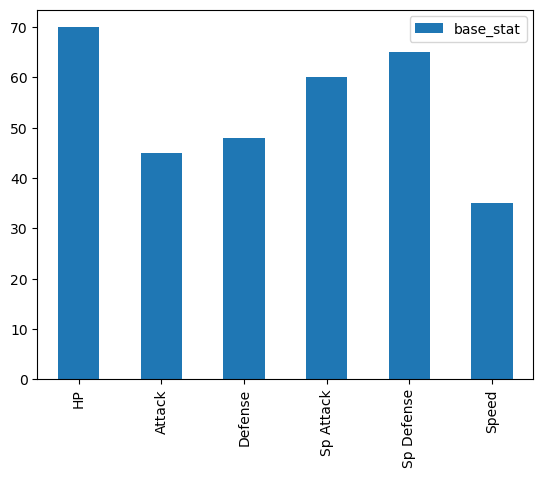

In [11]:
stats_viz('clefairy')

In [13]:
#extracting essential details to pull into a dataframe
    
def poke_info(pokemon):

    
    response1 = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}/').text
    response_info = json.loads(response1)
    name = response_info['name']
    type = response_info['types'][0]['type']['name'] 
    
    #Only some pokemon have a second type. this accounts for those without throwing an error
    
    try:
        type2 = response_info['types'][1]['type']['name']
    except IndexError:
        type2 = 'N/A'    
        
    hp = response_info['stats'][0]['base_stat']
    attack = response_info['stats'][1]['base_stat']
    defense = response_info['stats'][2]['base_stat']
    sp_atk = response_info['stats'][3]['base_stat']
    sp_def = response_info['stats'][4]['base_stat']
    speed = response_info['stats'][5]['base_stat']
    dex_id = pokemon
    
    return name, type, type2, hp, attack, defense, sp_atk, sp_def, speed, dex_id
    
    
  

In [14]:

poke_info('8')

('wartortle', 'water', 'N/A', 59, 63, 80, 65, 80, 58, '8')

In [15]:
 #this function takes pokemon index #'s as parameters and returns all in a df

def poke_df (start_dex, end_dex): 
    poke_list = []
    for i in range(start_dex, end_dex):
        poke_list.append(poke_info(i))
    col = ['name', 'type', 'type_2', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed', 'dex_id']
    df = pd.DataFrame(data=poke_list, columns = col)
    
    return df
        

In [16]:
#these numbers capture the most recent generation of pokemon (scarlet and violet)

sv = poke_df(906, 1009)
sv.head()

,name,type,type_2,hp,attack,defense,sp_atk,sp_def,speed,dex_id
0,sprigatito,grass,N/A,40,61,54,45,45,65,906
1,floragato,grass,N/A,61,80,63,60,63,83,907
2,meowscarada,grass,dark,76,110,70,81,70,123,908
3,fuecoco,fire,N/A,67,45,59,63,40,36,909
4,crocalor,fire,N/A,81,55,78,90,58,49,910


In [20]:

#Creating a new column to sum all stats, referred to as 'base stat total'. Also creating a new pokedex # column, but keeping index in tact

sv['base_total'] = sv['hp'] +sv['attack'] +sv['defense'] +sv['sp_atk'] +sv['sp_def'] +sv['speed'] 
sv.head()

,name,type,type_2,hp,attack,defense,sp_atk,sp_def,speed,dex_id,base_total
0,sprigatito,grass,N/A,40,61,54,45,45,65,906,310
1,floragato,grass,N/A,61,80,63,60,63,83,907,410
2,meowscarada,grass,dark,76,110,70,81,70,123,908,530
3,fuecoco,fire,N/A,67,45,59,63,40,36,909,310
4,crocalor,fire,N/A,81,55,78,90,58,49,910,411


In [21]:
#This shows the 10 strongest pokemon in the game, by ranking base total

sv.nlargest(10, 'base_total')

,name,type,type_2,hp,attack,defense,sp_atk,sp_def,speed,dex_id,base_total
101,koraidon,fighting,dragon,100,135,115,85,100,135,1007,670
102,miraidon,electric,dragon,100,85,100,135,115,135,1008,670
92,baxcalibur,dragon,ice,115,145,92,75,86,87,998,600
99,roaring-moon,dragon,dark,105,139,71,55,101,119,1005,590
100,iron-valiant,fairy,fighting,74,130,90,120,60,116,1006,590
78,great-tusk,ground,fighting,115,131,131,53,53,87,984,570
79,scream-tail,fairy,psychic,115,65,99,65,115,111,985,570
80,brute-bonnet,grass,dark,111,127,99,79,99,55,986,570
81,flutter-mane,ghost,fairy,55,55,55,135,135,135,987,570
82,slither-wing,bug,fighting,85,135,79,85,105,81,988,570


In [44]:
sv.groupby('type')['base_total'].mean().sort_values(ascending=False)

type
fighting    591.666667
dark        530.625000
ground      497.500000
flying      492.500000
dragon      484.833333
ice         475.000000
steel       457.500000
fairy       447.428571
fire        446.571429
rock        432.857143
electric    428.555556
normal      425.000000
ghost       412.000000
water       411.111111
grass       408.090909
poison      401.666667
bug         369.142857
psychic     368.000000
Name: base_total, dtype: float64

/Users/cstone/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


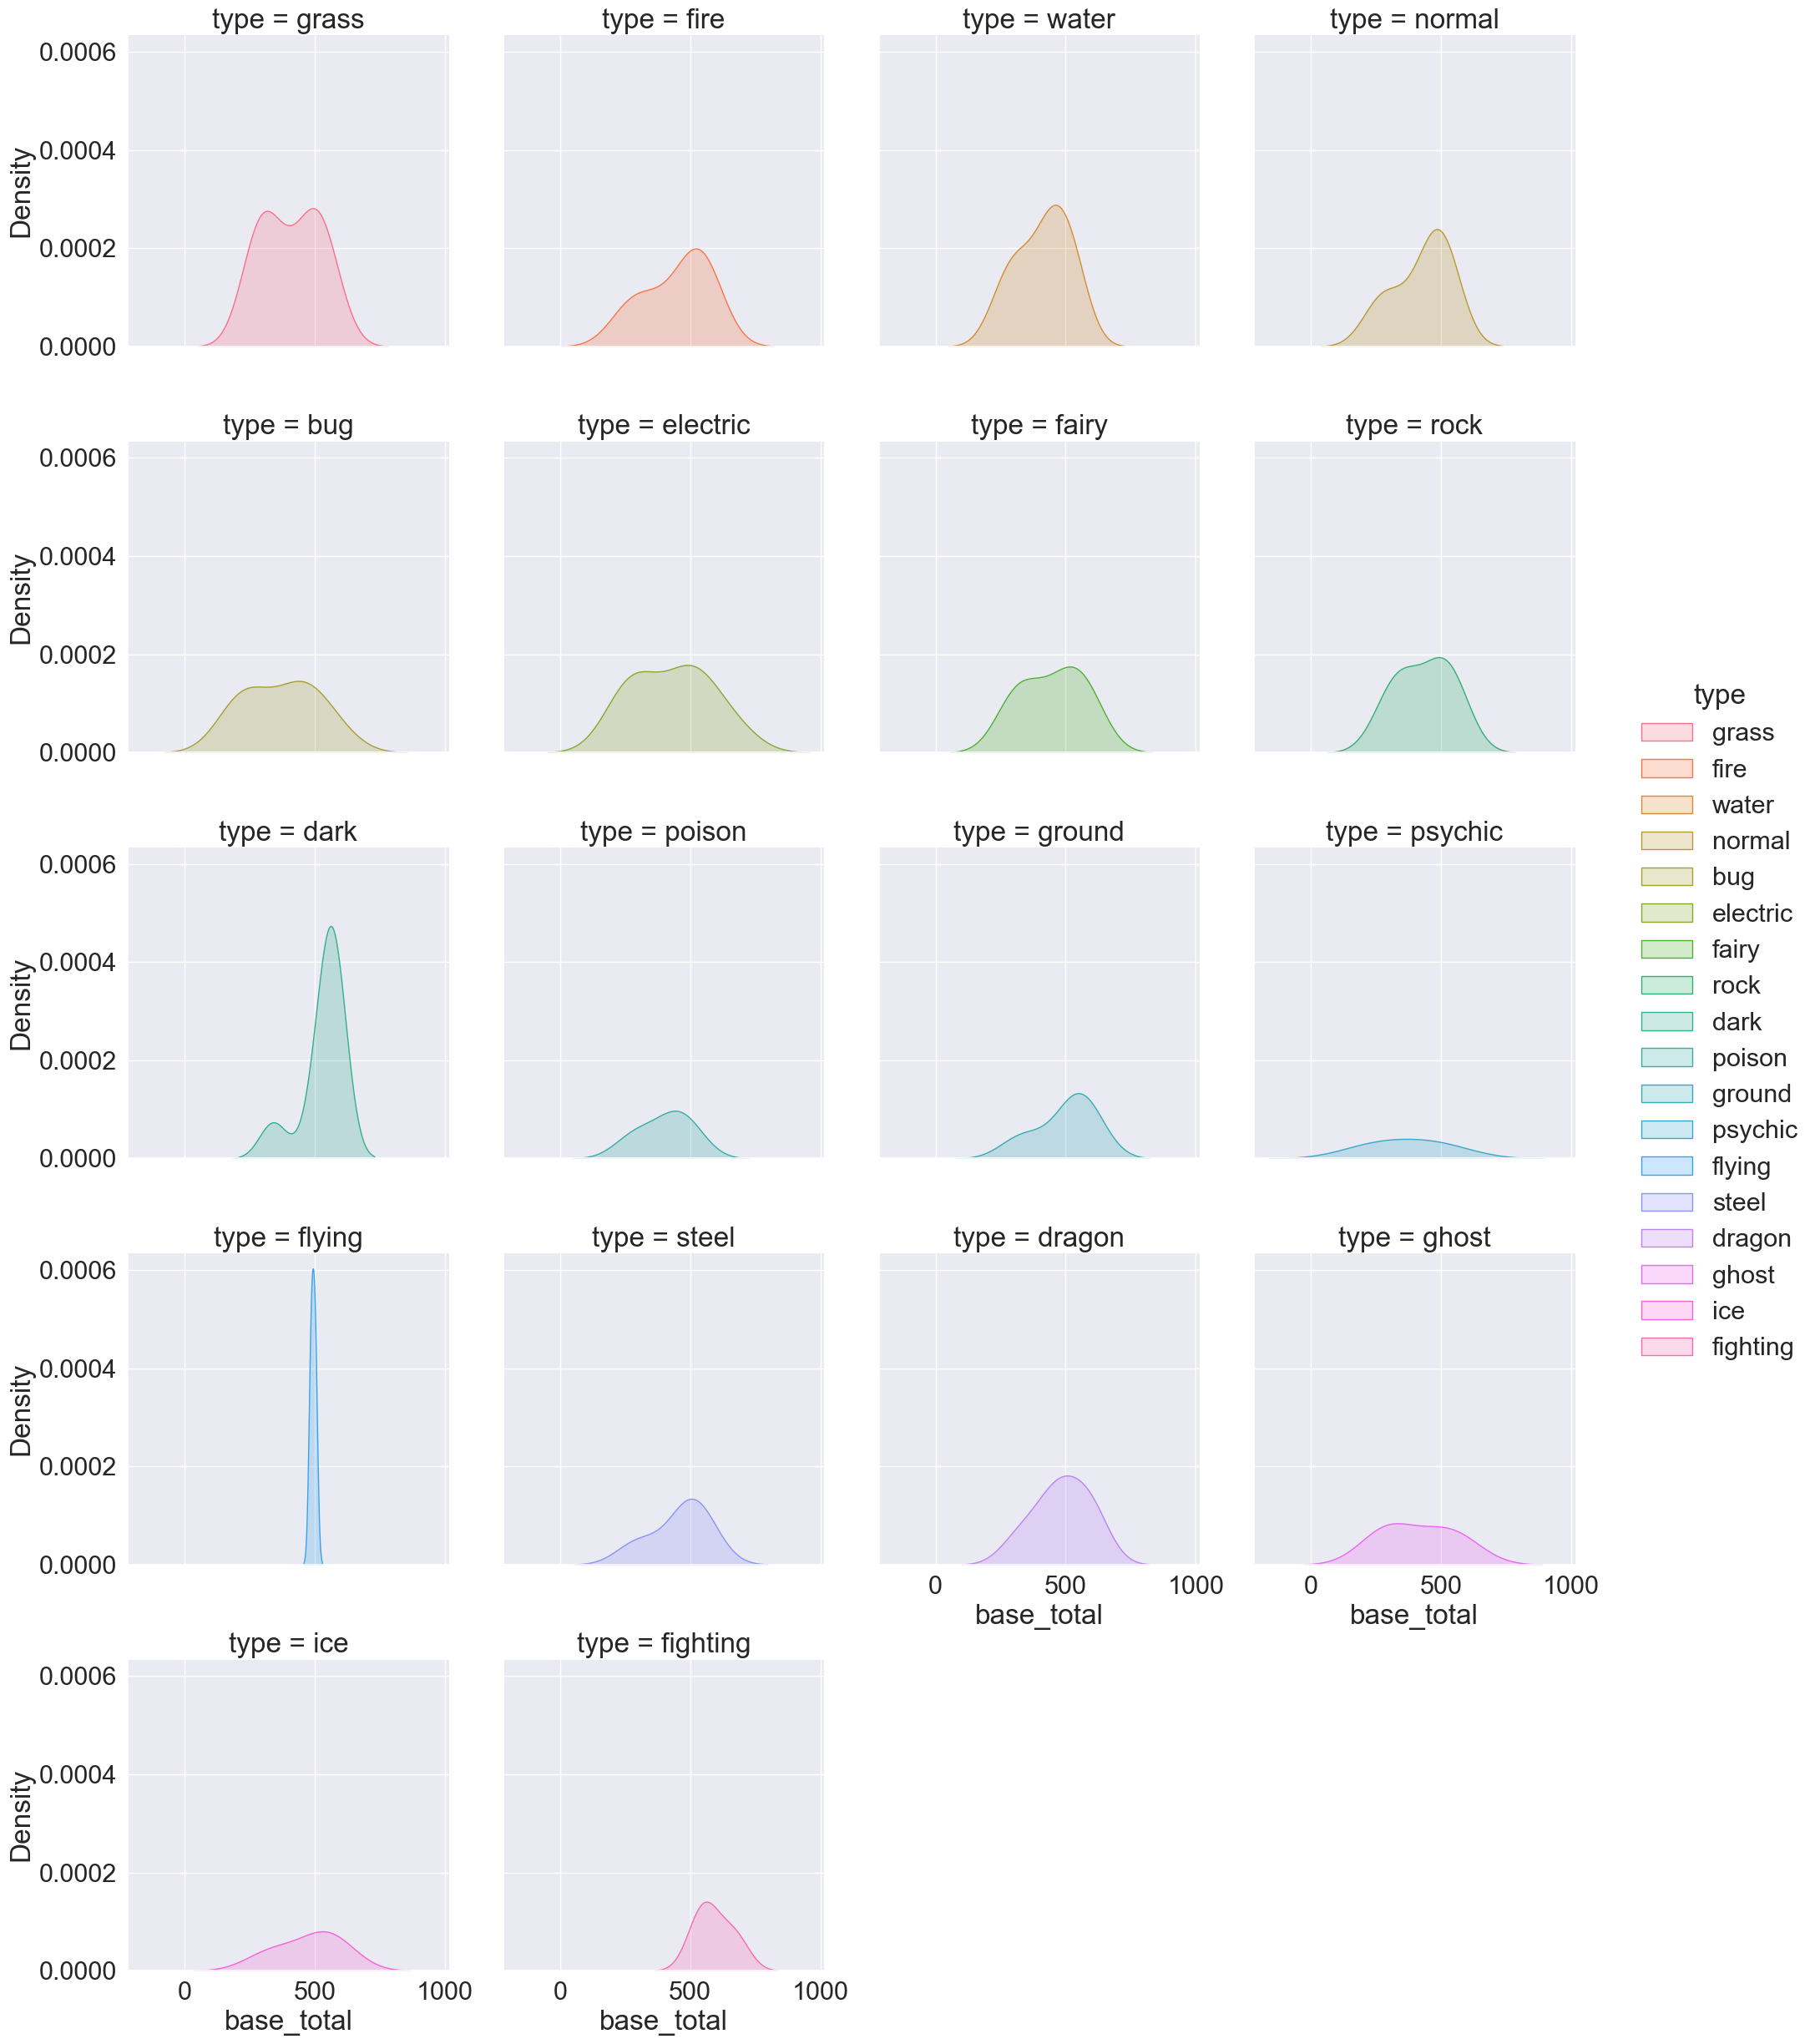

In [33]:

#looking at the stat distribution of each type
sns.set_theme(font_scale=2.0)
ax1 = sns.displot(sv, x='base_total', kind='kde', fill=True ,col='type', col_wrap = 4, hue='type')
plt.show()

In [51]:
#sv.groupby('type').agg({'base_total':('mean','count')})
sv.groupby(['type','type_2'])['dex_id'].count()


type      type_2  
bug       N/A         4
          dark        1
          fighting    1
          psychic     1
dark      N/A         2
          fire        1
          flying      1
          grass       1
          ground      1
          ice         1
          steel       1
dragon    dark        1
          ice         3
          normal      1
          water       1
electric  N/A         3
          dragon      1
          fighting    2
          flying      2
          ground      1
fairy     N/A         2
          fighting    1
          psychic     1
          steel       3
fighting  dragon      1
          electric    1
          ghost       1
fire      N/A         3
          ghost       2
          poison      1
          psychic     1
flying    dark        1
          fighting    1
ghost     N/A         3
          fairy       1
grass     N/A         3
          dark        2
          fire        1
          ghost       2
          normal      3
ground    fighting   

The next goal is using all of this data to understand how balanced and powerful your team is. In Pokemon, you can carry a team of up to six

In [ ]:
def team_summary (p1, p2=None, p3=None, p4=None, p5=None, p6=None):
    
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    id_list = [p1, p2, p3, p4, p5, p6]
    team_df = df[df['dex_id'].isin(id_list)]
    
    viz = sns.barplot(data=team_df[['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']])
    types = team_df['type'].nunique()
    second_types = team_df['type_2'].nunique()
    base_total = team_df['base_total'].mean()
    
    
    
    
    print(f'Primary type coverage: {types}  \
          \nSecondary type coverage: {second_types} \
          \nAvg base total: {base_total}\''
          )
    
    return viz
            
          

This function gives a high-level look at your team's overall strength

Primary type coverage: 4            
Secondary type coverage: 4           
Avg base total: 471.75'


<Axes: >

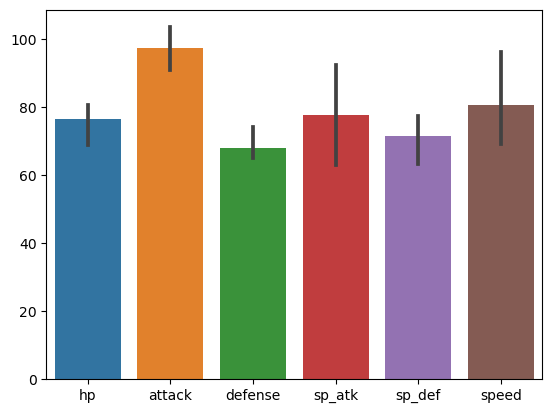

In [ ]:
team_summary(22, 34, 71, 119)

Now we'll import a type matchup chart. Every pokemon type has strengths and weaknesses to certain types. This will help call out team defensive weak points

For any type in the index column, the values can be interpreted as follows:  
0.5 : Weak,
1.0 : Neutral,
2.0 : Strong


In [ ]:

type_chart = pd.read_csv('type_chart.csv')
print(type_chart.head())

      Index  Normal  Fire  Water  Grass  Electric  Ice  Fighting  Poison  \
0    Normal       1   1.0    1.0    1.0       1.0  1.0       1.0     1.0   
1      Fire       1   0.5    0.5    2.0       1.0  2.0       1.0     1.0   
2     Water       1   2.0    0.5    0.5       1.0  1.0       1.0     1.0   
3     Grass       1   0.5    2.0    0.5       1.0  1.0       1.0     0.5   
4  Electric       1   1.0    2.0    0.5       0.5  1.0       1.0     1.0   

   Ground  Flying  Psychic  Bug  Rock  Ghost  Dragon  Dark  Steel  
0     1.0     1.0      1.0  1.0   0.5    0.0     1.0   1.0    0.5  
1     1.0     1.0      1.0  2.0   0.5    1.0     0.5   1.0    2.0  
2     2.0     1.0      1.0  1.0   2.0    1.0     0.5   1.0    1.0  
3     2.0     0.5      1.0  0.5   2.0    1.0     0.5   1.0    0.5  
4     0.0     2.0      1.0  1.0   1.0    1.0     0.5   1.0    1.0  


In [ ]:
types_unpivot = pd.melt(type_chart, id_vars=type_chart.iloc[:, :1], value_vars=type_chart.iloc[:, 1:])
types_unpivot = types_unpivot.sort_values('Index').reset_index(drop=True)
types_unpivot = types_unpivot.rename(columns={'Index': 'offense', 'variable': 'defense'})
print(types_unpivot.head(15))

   offense   defense  value
0      Bug    Normal    1.0
1      Bug  Fighting    0.5
2      Bug       Bug    1.0
3      Bug    Ground    1.0
4      Bug    Flying    0.5
5      Bug    Dragon    1.0
6      Bug      Rock    1.0
7      Bug      Fire    0.5
8      Bug     Ghost    0.5
9      Bug     Steel    0.5
10     Bug   Psychic    2.0
11     Bug     Water    1.0
12     Bug    Poison    0.5
13     Bug      Dark    2.0
14     Bug       Ice    1.0


In [ ]:
types_unpivot.groupby('defense')['value'].sum()

defense
Bug         18.5
Dark        17.0
Dragon      17.0
Electric    16.5
Fighting    17.5
Fire        17.5
Flying      17.5
Ghost       16.0
Grass       20.0
Ground      18.0
Ice         20.5
Normal      17.0
Poison      17.0
Psychic     19.0
Rock        20.0
Steel       13.5
Water       17.0
Name: value, dtype: float64

In [ ]:
new = df.merge(types_unpivot, left_on='type', right_on='defense')
new

,name,type,type_2,hp,attack,defense_x,sp_atk,sp_def,speed,base_total,dex_id,offense,defense_y,value
